## 1. What is the underlying concept of Support Vector Machines?

        The most basic concept of Support Vector Machine is to divide the classes by the widest possible streets(i.e. the decision boundaries)

## 2. What is the concept of a support vector?

        Support vectors are the instances located at the edges of the decision boundaries

## 3. When using SVMs, why is it necessary to scale the inputs?

        Feature scaling is important in SVM because the distance between two observations differ for scaled and non scaled data

## 4. When an SVM classifier classifies a case, can it output a confidence score? What about a percentage chance?

        SVM classofiers do not output probabilities of each class

## 5. Should you train a model on a training set with millions of instances and hundreds of features using the primal or dual form of the SVM problem?

        Primal form should be used in this case as dual form will be much slow

        

## 6. Let's say you've used an RBF kernel to train an SVM classifier, but it appears to underfit the training collection. Is it better to raise or lower (gamma)? What about the letter C?

        For underfitting,the value of gamma should be increased,same goes for c as well

## 7. To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should the QP parameters (H, f, A, and b) be set?

        i. H is equal to H-dash ,plus m columns of 0s on the right and m rows of 0s at the bottom
        
       ii. f is equal to f-dash with m additional elements,all equal to the value of the hyperparameter c
       
      iii. b is equal to b-dash with m additional elements,all equal to 0
      
       iv. A is equal to A-dash,with an extra m x m identity matrix Im appended to the right

## 8. On a linearly separable dataset, train a LinearSVC. Then, using the same dataset, train an SVC and an SGDClassifier. See if you can get them to make a model that is similar to yours.

### a. LinearSVC

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [3]:
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


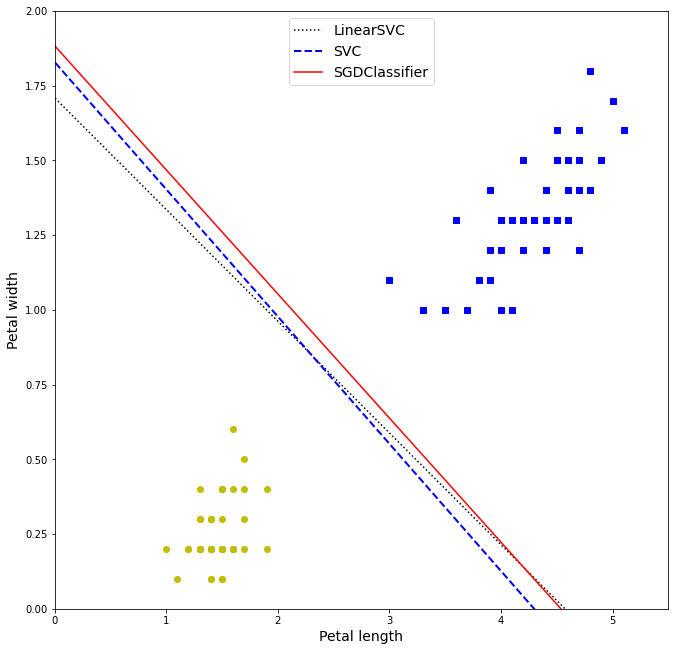

In [4]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 11))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

## 9. On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all 10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want to tune the hyperparameters using small validation sets. What level of precision can you achieve?

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [6]:
lin_clf = LinearSVC()
lin_clf.fit(X_train,y_train)

C:\Users\home\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [7]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train,y_pred)

0.8889166666666667

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
lin_clf = LinearSVC()
lin_clf.fit(X_train_scaled,y_train)

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

## 10. On the California housing dataset, train an SVM regressor.

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

In [9]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled,y_train)

C:\Users\home\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [15]:
import numpy as np

In [16]:
np.sqrt(mse)

0.9819256687727764

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,uniform

In [18]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  10.7s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  10.5s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  10.9s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.3s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  10.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  10.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  10.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  10.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  10.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022A16AA4D30>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022A151DEE80>},
                   random_state=42, verbose=2)

In [19]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [20]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785369